In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/outliersremoveddata/File5.csv


In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 7.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

2024-06-11 07:49:18.206827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 07:49:18.206986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 07:49:18.349559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
%matplotlib inline

In [4]:
st = StandardScaler()
le = LabelEncoder()
minmax = MinMaxScaler(feature_range = (-1,1))

In [5]:
df = pd.read_csv('/kaggle/input/outliersremoveddata/File5.csv')

In [6]:
hour2022 = df[df['Year'] == 2022]
hour2022.set_index('Date_Time', inplace=True)
hour2022.index = pd.to_datetime(hour2022.index)
hour2022['Date'], hour2022['Time'] = hour2022.index.date, hour2022.index.time

In [7]:
hour2022

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,Date,Time
Date_Time,,,,,,,,,,,,
2022-01-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00
2022-01-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,2,5,0.0,2022-01-01,01:00:00
2022-01-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,3,5,0.0,2022-01-01,02:00:00
2022-01-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,4,5,0.0,2022-01-01,03:00:00
2022-01-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,5,5,0.0,2022-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,12,0,0,20,5,0.0,2022-12-31,19:00:00
2022-12-31 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,12,0,0,21,5,0.0,2022-12-31,20:00:00
2022-12-31 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,12,0,0,22,5,0.0,2022-12-31,21:00:00


In [8]:
hour2022_copy = hour2022.copy()

## Outlier removal

## Preprocessing

In [10]:
## Encoding station pairs using labelencoder

hour2022['station_pair_encoded'] = le.fit_transform(hour2022['Station_Pair'])
hour2022.drop(['Station_Pair'], axis=1, inplace=True)

In [28]:
# hour2022.drop(['Year'], axis=1, inplace=True)
hour2022.drop(['Date', 'Time'], axis=1, inplace=True)

In [29]:
hour2022.columns

Index(['Sid', 'Did', 'Year', 'Month', 'Is_Holiday', 'Holiday_Type',
       'OneHourSlot', 'Weekday', 'Passenger_Count', 'station_pair_encoded'],
      dtype='object')

In [30]:
# encode_features = ['Sid', 'Did', 'Is_Holiday', 'Holiday_Type', 'Weekday', 'OneHourSlot']

# for feature in encode_features:
#     hour2022[feature] = le.fit_transform(hour2022[feature])

# for feature in encode_features:
#     hour2022[feature] = minmax.fit_transform(hour2022[feature].values.reshape(-1,1))

In [31]:
leftover_features = ['station_pair_encoded', 'Passenger_Count']

for feature in leftover_features:
    hour2022[feature] = st.fit_transform(hour2022[feature].values.reshape(-1,1))

In [32]:
hour2022

,Sid,Did,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,station_pair_encoded
Date_Time,,,,,,,,,,
2022-01-01 00:00:00,10.0,8.0,2022,1,0,0,1,5,-0.222038,-1.681836
2022-01-01 01:00:00,10.0,8.0,2022,1,0,0,2,5,-0.222038,-1.681836
2022-01-01 02:00:00,10.0,8.0,2022,1,0,0,3,5,-0.222038,-1.681836
2022-01-01 03:00:00,10.0,8.0,2022,1,0,0,4,5,-0.222038,-1.681836
2022-01-01 04:00:00,10.0,8.0,2022,1,0,0,5,5,-0.222038,-1.681836
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,12.0,8.0,2022,12,0,0,20,5,-0.222038,1.681836
2022-12-31 20:00:00,12.0,8.0,2022,12,0,0,21,5,-0.222038,1.681836
2022-12-31 21:00:00,12.0,8.0,2022,12,0,0,22,5,-0.222038,1.681836


In [33]:
## Resampling and Interpolation

hour2022_values = hour2022[['Passenger_Count']]
hour2022_values.interpolate(method='polynomial', order=2, inplace=True, axis=0)

In [70]:
hour2022_values = hour2022_values.resample('H').max().ffill()

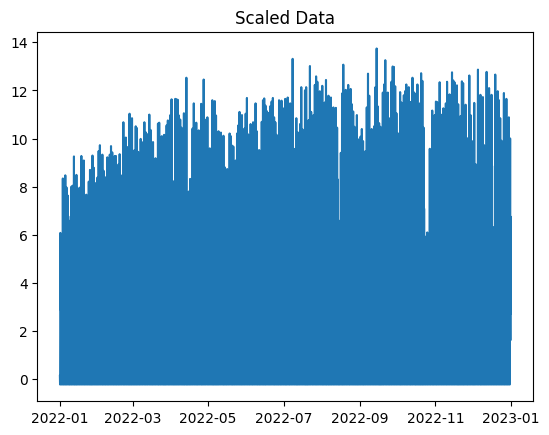

In [20]:
plt.plot(hour2022_values)
plt.title('Scaled Data')
plt.show()

In [20]:
import statsmodels.tsa.seasonal as sm

sd = sm.seasonal_decompose(
    hour2022_values,
    model = 'additive',
    period = 10
)

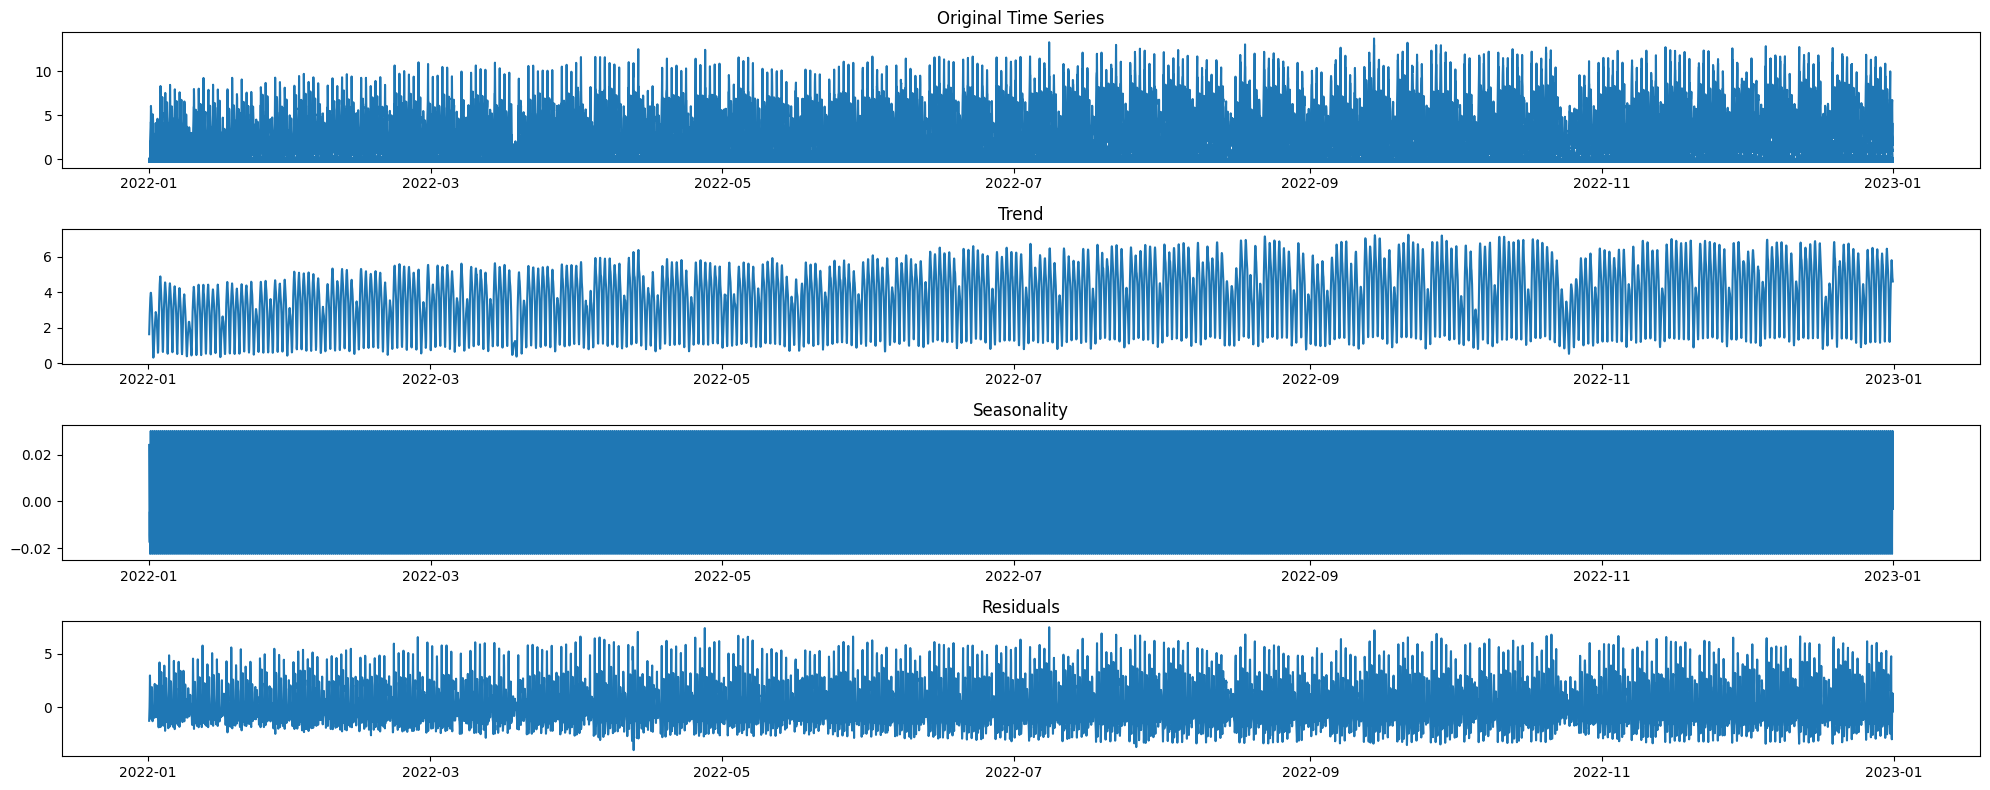

In [21]:
plt.figure(figsize=(20, 8))

plt.subplot(4, 1, 1)
plt.plot(hour2022['Passenger_Count'])
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(sd.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(sd.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(sd.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [21]:
hour2022_values = hour2022_values.values

## Lag and exponential features

In [9]:
hour2022_copy.sort_index(inplace=True)

In [10]:
def random_noise(dataframe):
    return np.random.normal(size = len(dataframe))

In [11]:
def random_noise(dataframe):
    return np.random.normal(scale=1, size=len(dataframe))

def lag_features(dataframe, lag):
    dataframe = dataframe.copy()
    # Create the lagged feature
    dataframe['Passenger_Count_Lagged_by_' + str(lag)] = dataframe['Passenger_Count'].shift(lag)
    dataframe['Passenger_Count_Lagged_by_' + str(lag)] = dataframe['Passenger_Count_Lagged_by_' + str(lag)] + random_noise(dataframe)
    return dataframe

In [12]:
hour2022_lagged_1 = lag_features(hour2022_copy, 1)

In [13]:
hour2022_lagged_1

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,Date,Time,Passenger_Count_Lagged_by_1
Date_Time,,,,,,,,,,,,,
2022-01-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00,NaN
2022-01-01 00:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00,1.008325
2022-01-01 00:00:00,8.0,14.0,Thane Station West-Pawar Nagar,2022,1,0,0,1,5,19.0,2022-01-01,00:00:00,2.056572
2022-01-01 00:00:00,8.0,12.0,Thane Station West-Voltas Gate,2022,1,0,0,1,5,13.0,2022-01-01,00:00:00,19.979635
2022-01-01 00:00:00,2.0,8.0,Majiwadanaka-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00,11.291622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,8.0,12.0,Thane Station West-Voltas Gate,2022,12,0,0,24,5,63.0,2022-12-31,23:00:00,1.246456
2022-12-31 23:00:00,12.0,3.0,Voltas Gate-Cadbury Company,2022,12,0,0,24,5,0.0,2022-12-31,23:00:00,62.369242
2022-12-31 23:00:00,12.0,5.0,Voltas Gate-Civil/Court,2022,12,0,0,24,5,0.0,2022-12-31,23:00:00,1.301249


In [14]:
def exponential_features(dataframe, column, alpha):
    dataframe = dataframe.copy()
    dataframe[column] = dataframe[column].ewm(alpha = alpha).mean()
    return dataframe

def rolling_mean(dataframe, column, window, noise = False):
    dataframe['rolling_' + column] = dataframe[column].shift(1).rolling(
        window = window,
        min_periods = 18,
        win_type = 'traingular'
    ).mean()
    
    if noise == False:
        return dataframe
    else:
        dataframe['rolling_' + column] = dataframe['rolling_' + column] + random_noise(dataframe)

def log_features(dataframe, column):
    dataframe['log_' + column] = np.log(dataframe[column].values)

In [15]:
hour2022_ewm = exponential_features(hour2022_lagged_1, 'Passenger_Count_Lagged_by_1', 0.75)

In [16]:
hour2022_ewm

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,Date,Time,Passenger_Count_Lagged_by_1
Date_Time,,,,,,,,,,,,,
2022-01-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00,NaN
2022-01-01 00:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00,1.008325
2022-01-01 00:00:00,8.0,14.0,Thane Station West-Pawar Nagar,2022,1,0,0,1,5,19.0,2022-01-01,00:00:00,1.846923
2022-01-01 00:00:00,8.0,12.0,Thane Station West-Voltas Gate,2022,1,0,0,1,5,13.0,2022-01-01,00:00:00,15.662322
2022-01-01 00:00:00,2.0,8.0,Majiwadanaka-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00,12.371442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,8.0,12.0,Thane Station West-Voltas Gate,2022,12,0,0,24,5,63.0,2022-12-31,23:00:00,20.175012
2022-12-31 23:00:00,12.0,3.0,Voltas Gate-Cadbury Company,2022,12,0,0,24,5,0.0,2022-12-31,23:00:00,51.820684
2022-12-31 23:00:00,12.0,5.0,Voltas Gate-Civil/Court,2022,12,0,0,24,5,0.0,2022-12-31,23:00:00,13.931108


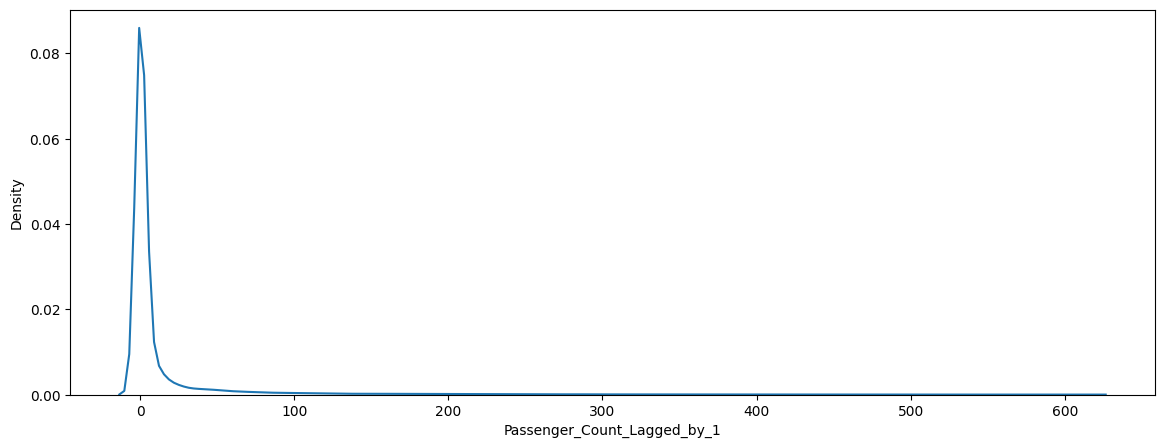

In [17]:
plt.figure(figsize = (14,5))
sns.kdeplot(hour2022_ewm['Passenger_Count_Lagged_by_1'])
plt.show()

## Models

In [21]:
timestep = 10
train_split = int(len(hour2022_values)*0.8)
train, test = hour2022_values[:train_split], hour2022_values[train_split:]

X_train, y_train = [],[]
X_test, y_test = [],[]

for i in range(len(train)-timestep):
    X_train.append(train[i:i+timestep])
    y_train.append(train[i+timestep])

for i in range(len(test)-timestep):
    X_test.append(test[i:i+timestep])
    y_test.append(test[i+timestep])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [96]:
print(X_train.shape, y_train.shape)

(282, 10, 1) (282, 1)


In [110]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, activation = 'relu', input_shape=(10,1), return_sequences=True),
    tf.keras.layers.LSTM(50, activation = 'relu', return_sequences=False),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'mse',
    metrics = ['mse']
)

In [111]:
LSTM_history = model.fit(X_train, y_train, batch_size=16, epochs=30)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2379 - mse: 0.2379
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1142 - mse: 0.1142
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0930 - mse: 0.0930
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0841 - mse: 0.0841
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0859 - mse: 0.0859
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0787 - mse: 0.0787
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1008 - mse: 0.1008
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0747 - mse: 0.0747
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0785 - mse: 0.0785
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0783 - mse: 0.0783
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0756 - mse: 0.0756
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0594 - mse: 0.0594
Epoch 13/25
18/18 ━━━━━━━━━━━━━━━━━━━

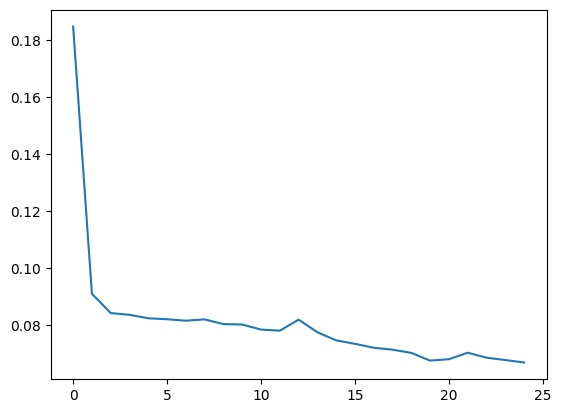

In [112]:
plt.plot(LSTM_history.history['loss'])
plt.show()

In [141]:
class LSTMmodel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(LSTMmodel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True)
        self.fc = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        h0_1 = torch.zeros(1, x.size(0), self.lstm1.hidden_size)
        c0_1 = torch.zeros(1, x.size(0), self.lstm1.hidden_size)
        
        out, (hn1, cn1) = self.lstm1(x,(h0_1, c0_1))
        
        h0_2 = torch.zeros(1, x.size(0), self.lstm2.hidden_size)
        c0_2 = torch.zeros(1, x.size(0), self.lstm2.hidden_size)
        
        out, (hn2, cn2) = self.lstm2(out, (h0_2, c0_2))
        
        out = self.fc(out[:, -1, :])
        return out

In [142]:
model = LSTMmodel(1, 100, 50, 10)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [143]:
X_train_tensor, y_train_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test_tensor, y_test_tensor = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [144]:
X_train_tensor.shape

torch.Size([6998, 10, 1])

In [145]:
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    optimizer.zero_grad()
    
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/150], Loss: 0.2012
Epoch [20/150], Loss: 0.1716
Epoch [30/150], Loss: 0.1143
Epoch [40/150], Loss: 0.0460
Epoch [50/150], Loss: 0.0264
Epoch [60/150], Loss: 0.0230
Epoch [70/150], Loss: 0.0214
Epoch [80/150], Loss: 0.0195
Epoch [90/150], Loss: 0.0172
Epoch [100/150], Loss: 0.0216
Epoch [110/150], Loss: 0.0168
Epoch [120/150], Loss: 0.0147
Epoch [130/150], Loss: 0.0135
Epoch [140/150], Loss: 0.0125
Epoch [150/150], Loss: 0.0117


In [146]:
model.eval()
with torch.no_grad():
    test = model(X_test_tensor)
    test_loss = criterion(test, y_test_tensor)
    print(f"Test loss: {test_loss.item()}")

Test loss: 0.014423406682908535


## AutoEncoders

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [23]:
class AutoEncoder(Model):
    def __init__(self, latent_dim, shape):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),)
            layers.Dense(latent_dim, activation='relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
            layers.Reshape(shape)
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [24]:
auto = AutoEncoder(latent_dim = 64, shape = (10,1))
auto.compile(
    optimizer = 'adam',
    loss = losses.MeanSquaredError()
)

In [25]:
auto.fit(
    X_train, y_train,
    epochs = 10,
    shuffle = True,
    validation_data = (X_test, y_test)
)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7364 - val_loss: 0.3678
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3876 - val_loss: 0.3546
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3831 - val_loss: 0.3526
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3865 - val_loss: 0.3520
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3765 - val_loss: 0.3518
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3843 - val_loss: 0.3517
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3798 - val_loss: 0.3516
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3769 - val_loss: 0.3515
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3768 - val_loss: 0.3514
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3835 - val_loss: 0.3514


In [26]:
encoded_stuff = auto.encoder(X_test).numpy()
decoded_stuff = auto.decoder(encoded_stuff).numpy()

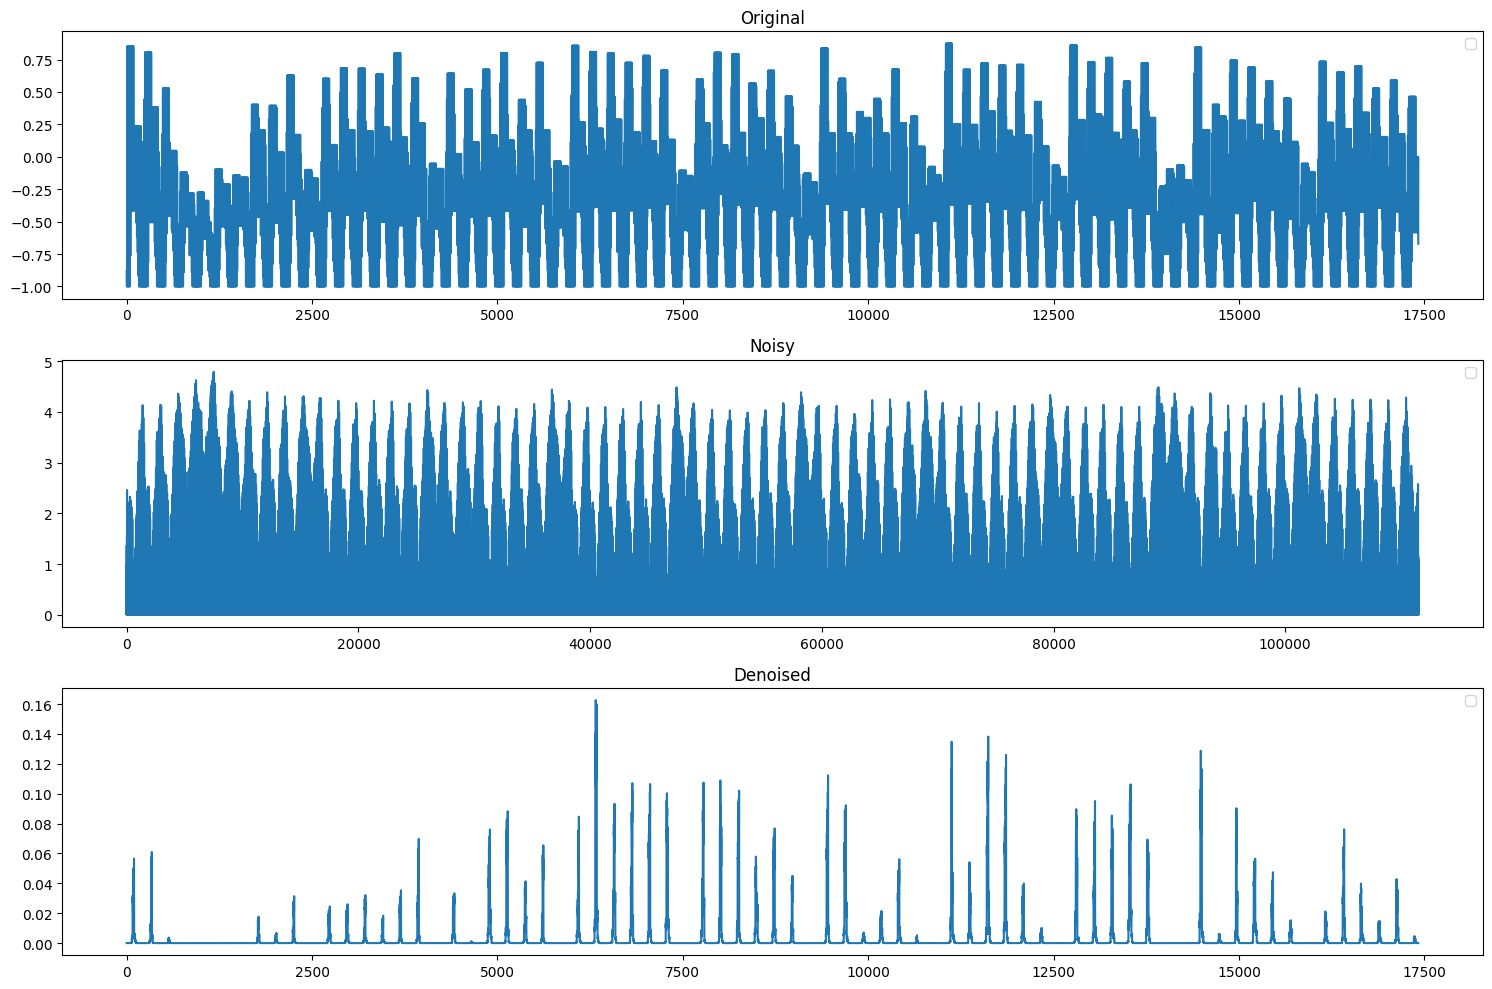

In [29]:
import matplotlib.pyplot as plt

# Define the number of examples to display
n = 5

X_test_new = X_test.reshape(-1,1)
encoded_new = encoded_stuff.reshape(-1,1)
decoded_new = decoded_stuff.reshape(-1,1)

# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Plot the original data
plt.subplot(3, 1, 1)
plt.plot(X_test_new)
plt.title('Original')
plt.legend()
plt.axis('on')

# Plot the noisy data
plt.subplot(3, 1, 2)
plt.plot(encoded_new)
plt.title('Noisy')
plt.legend()
plt.axis('on')

# Plot the denoised data
plt.subplot(3, 1, 3)
plt.plot(decoded_new)
plt.title('Denoised')
plt.legend()
plt.axis('on')

# Display the plots
plt.tight_layout()
plt.show()

## NBEATS

In [21]:
from darts import concatenate
from darts.models import NBEATSModel, TransformerModel
from darts.dataprocessing.transformers import Scaler
from darts.timeseries import TimeSeries
from darts.metrics import mape, r2_score

In [17]:
data = hour2022[['Passenger_Count']]
data.interpolate(method='time', order=2, inplace=True, axis=0)
data = data.resample('D').sum().ffill()

Text(0.5, 1.0, 'Something plotted here')

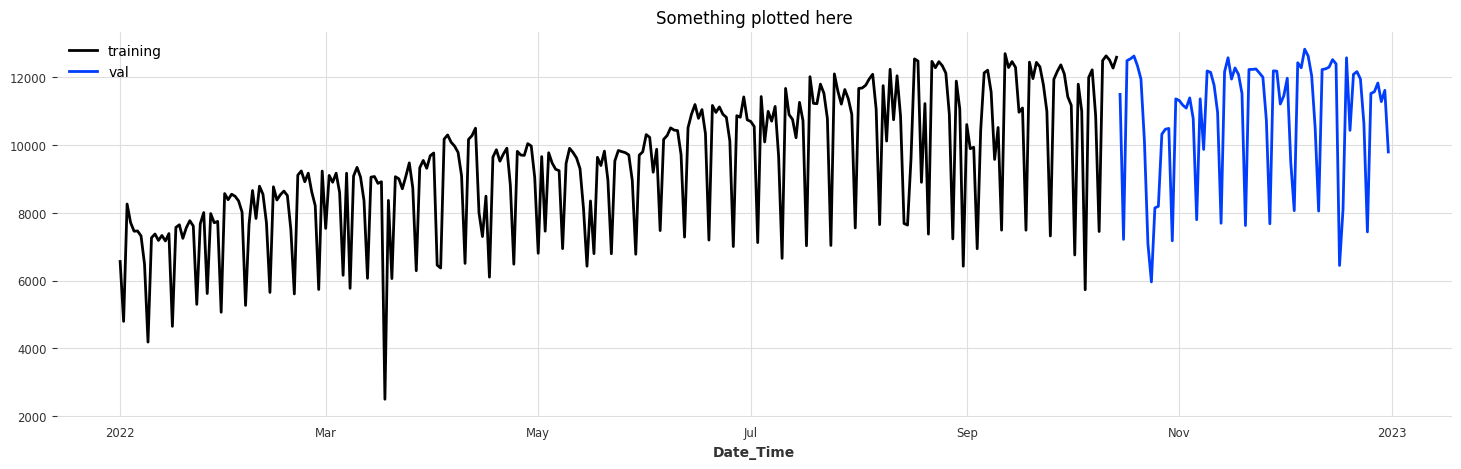

In [35]:
time_series = TimeSeries.from_dataframe(data, fill_missing_dates=True)
train_scaled, val_scaled = time_series.split_after(pd.Timestamp("20221014"))

plt.figure(figsize=(18,5))
train_scaled.plot(label="training")
val_scaled.plot(label="val")
plt.title("Something plotted here")

In [ ]:
model_name = "nbeats_run"

NModel = NBEATSModel(
    input_chunk_length = 40, 
    output_chunk_length = 14,
    generic_architecture=True,
    num_stacks = 15,
    n_epochs = 10,
    random_state = 42,
    model_name = model_name,
#     activation = 'LeakyReLU'
)

In [ ]:
NModel.fit(train_scaled, val_series=val_scaled)

In [44]:
pred_series = NModel.historical_forecasts(
    time_series,
    start = val_scaled.start_time(),
    forecast_horizon = 7,
    stride = 7,
    last_points_only = False,
    retrain = False,
    verbose = True
)

Predicting: |          | 0/? [00:00<?, ?it/s]

In [45]:
pred_series = concatenate(pred_series)

In [49]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date = None):
    plt.figure(figsize=(20,5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label = ("historic" + forecast_type + "forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

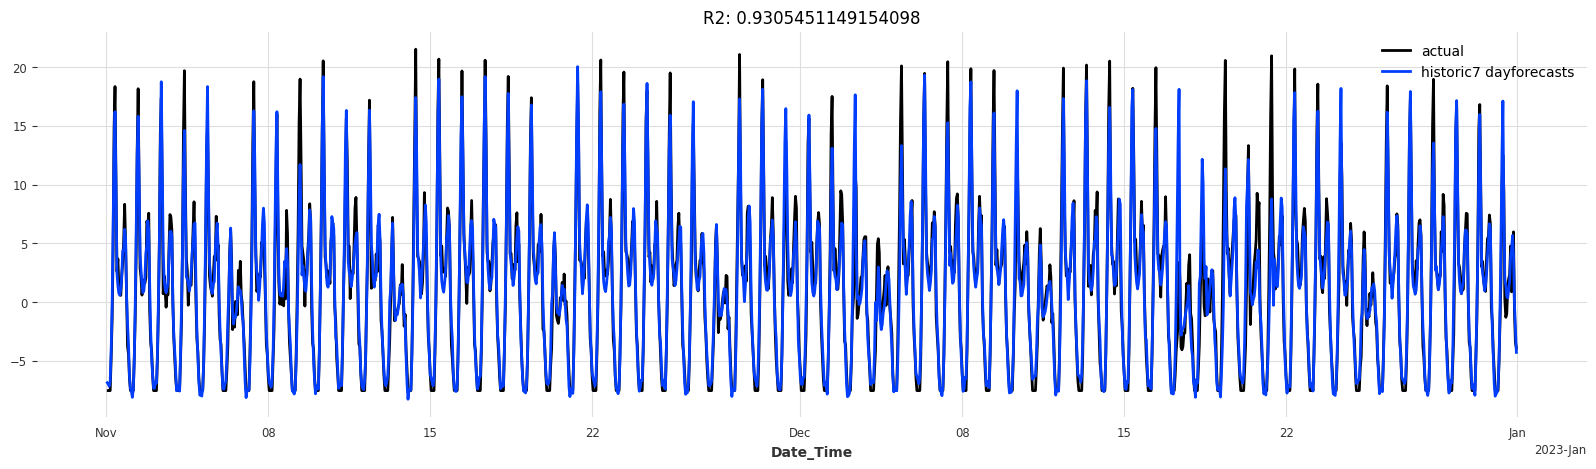

In [50]:
display_forecast(pred_series, time_series, "7 day", start_date=val_scaled.start_time())

## Transformer - darts implementation

In [19]:
t_data = hour2022[['Passenger_Count']].copy().astype(np.float32)

In [22]:
t_data = t_data.resample('H').mean().ffill()

series = TimeSeries.from_dataframe(t_data, fill_missing_dates=True)

train, val = series.split_after(pd.Timestamp("20221101"))

scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.fit_transform(val)
series_scaled = scaler.fit_transform(series)

In [23]:
transformer_model = TransformerModel(
    input_chunk_length=12,
    output_chunk_length=1,
    batch_size=32,
    n_epochs=10,
    nhead=8,
    num_encoder_layers=2,
    num_decoder_layers=2,
    dim_feedforward=128,
    dropout=0.1,
    activation="relu",
    random_state=42,
    force_reset=True,
)

In [24]:
transformer_model.fit(series = train_scaled, val_series = val_scaled, verbose = True)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

TransformerModel(output_chunk_shift=0, d_model=64, nhead=8, num_encoder_layers=2, num_decoder_layers=2, dim_feedforward=128, dropout=0.1, activation=relu, norm_type=None, custom_encoder=None, custom_decoder=None, input_chunk_length=12, output_chunk_length=1, batch_size=32, n_epochs=10, random_state=42, force_reset=True)

In [26]:
backtest_features = transformer_model.historical_forecasts(
    series = series_scaled,
    start = pd.Timestamp("20221101"),
    forecast_horizon = 6,
    retrain = False,
    verbose = True
)

Predicting: |          | 0/? [00:00<?, ?it/s]

Text(0.5, 1.0, 'Backtest')

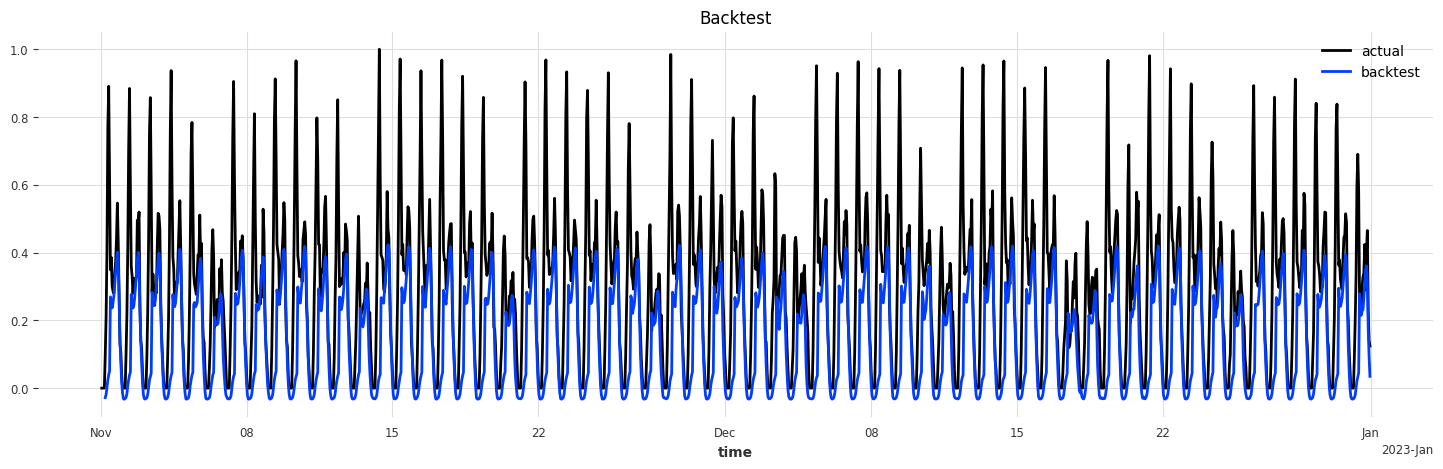

In [35]:
plt.figure(figsize=(18, 5))
val_scaled.plot(label="actual", lw=2)
backtest_features.plot(label="backtest", lw=2)
plt.legend()
plt.title("Backtest")

## LSTM using multivariate

In [29]:
hour2022 = hour2022.values

In [30]:
hour2022_new = hour2022.astype(np.float32)

In [32]:
# print(hour2022_new)

In [33]:
timestep = 10
train_split = int(len(hour2022)*0.8)
train, test = hour2022_new[:train_split], hour2022_new[train_split:]

X_train, y_train = [],[]
X_test, y_test = [],[]

for i in range(len(train)-timestep):
    X_train.append(train[i:i+timestep])
    y_train.append(train[i+timestep])

for i in range(len(test)-timestep):
    X_test.append(test[i:i+timestep])
    y_test.append(test[i+timestep])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [34]:
print(X_train.shape, y_train.shape)

(238262, 10, 10) (238262, 10)


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(200, activation='relu', input_shape=(10, 10), return_sequences=True),
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(10, activation='relu'),  # Adding activation function for non-linearity
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=['mse']
)

In [ ]:
# LSTM_history = model.fit(X_train, y_train, batch_size=128, epochs=5)

## SHAP Analysis using XGBoost, and feature sets exploration

In [44]:
hour2022_copy = hour2022.copy()

In [72]:
hour2022.drop('Year', axis=1, inplace=True)
hour2022.drop('Weekday', axis=1, inplace=True)

In [73]:
hour2022

,Sid,Did,Month,Is_Holiday,Holiday_Type,OneHourSlot,Passenger_Count,station_pair_encoded
Date_Time,,,,,,,,
2022-01-01 00:00:00,10.0,8.0,1,0,0,1,-0.222038,-1.681836
2022-01-01 01:00:00,10.0,8.0,1,0,0,2,-0.222038,-1.681836
2022-01-01 02:00:00,10.0,8.0,1,0,0,3,-0.222038,-1.681836
2022-01-01 03:00:00,10.0,8.0,1,0,0,4,-0.222038,-1.681836
2022-01-01 04:00:00,10.0,8.0,1,0,0,5,-0.222038,-1.681836
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,12.0,8.0,12,0,0,20,-0.222038,1.681836
2022-12-31 20:00:00,12.0,8.0,12,0,0,21,-0.222038,1.681836
2022-12-31 21:00:00,12.0,8.0,12,0,0,22,-0.222038,1.681836


In [198]:
# hour2022 = hour2022.resample('D').mean().ffill()

In [199]:
hour2022

,Sid,Did,Month,Is_Holiday,Holiday_Type,OneHourSlot,Passenger_Count,station_pair_encoded,cat_feature_encoded,cat_feature_encoded_1,Is_Holiday_Encoded,cat_feature_encoded_3
Date_Time,,,,,,,,,,,,
2022-01-01,9.382353,8.147059,1.0,0.0,0.0,12.5,-0.071640,0.0,1067.881034,1067.881034,276624.0,-1546.324863
2022-01-02,9.382353,8.147059,1.0,0.0,0.0,12.5,-0.112143,0.0,1067.881034,1067.881034,276624.0,-1546.324863
2022-01-03,9.382353,8.147059,1.0,0.0,0.0,12.5,-0.032741,0.0,1067.881034,1067.881034,276624.0,-1546.324863
2022-01-04,9.382353,8.147059,1.0,0.0,0.0,12.5,-0.045295,0.0,1067.881034,1067.881034,276624.0,-1546.324863
2022-01-05,9.382353,8.147059,1.0,0.0,0.0,12.5,-0.051136,0.0,1067.881034,1067.881034,276624.0,-1546.324863
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,9.382353,8.147059,12.0,0.0,0.0,12.5,0.043226,0.0,1067.881034,1067.881034,276624.0,796.527126
2022-12-28,9.382353,8.147059,12.0,0.0,0.0,12.5,0.049136,0.0,1067.881034,1067.881034,276624.0,796.527126
2022-12-29,9.382353,8.147059,12.0,0.0,0.0,12.5,0.036559,0.0,1067.881034,1067.881034,276624.0,796.527126


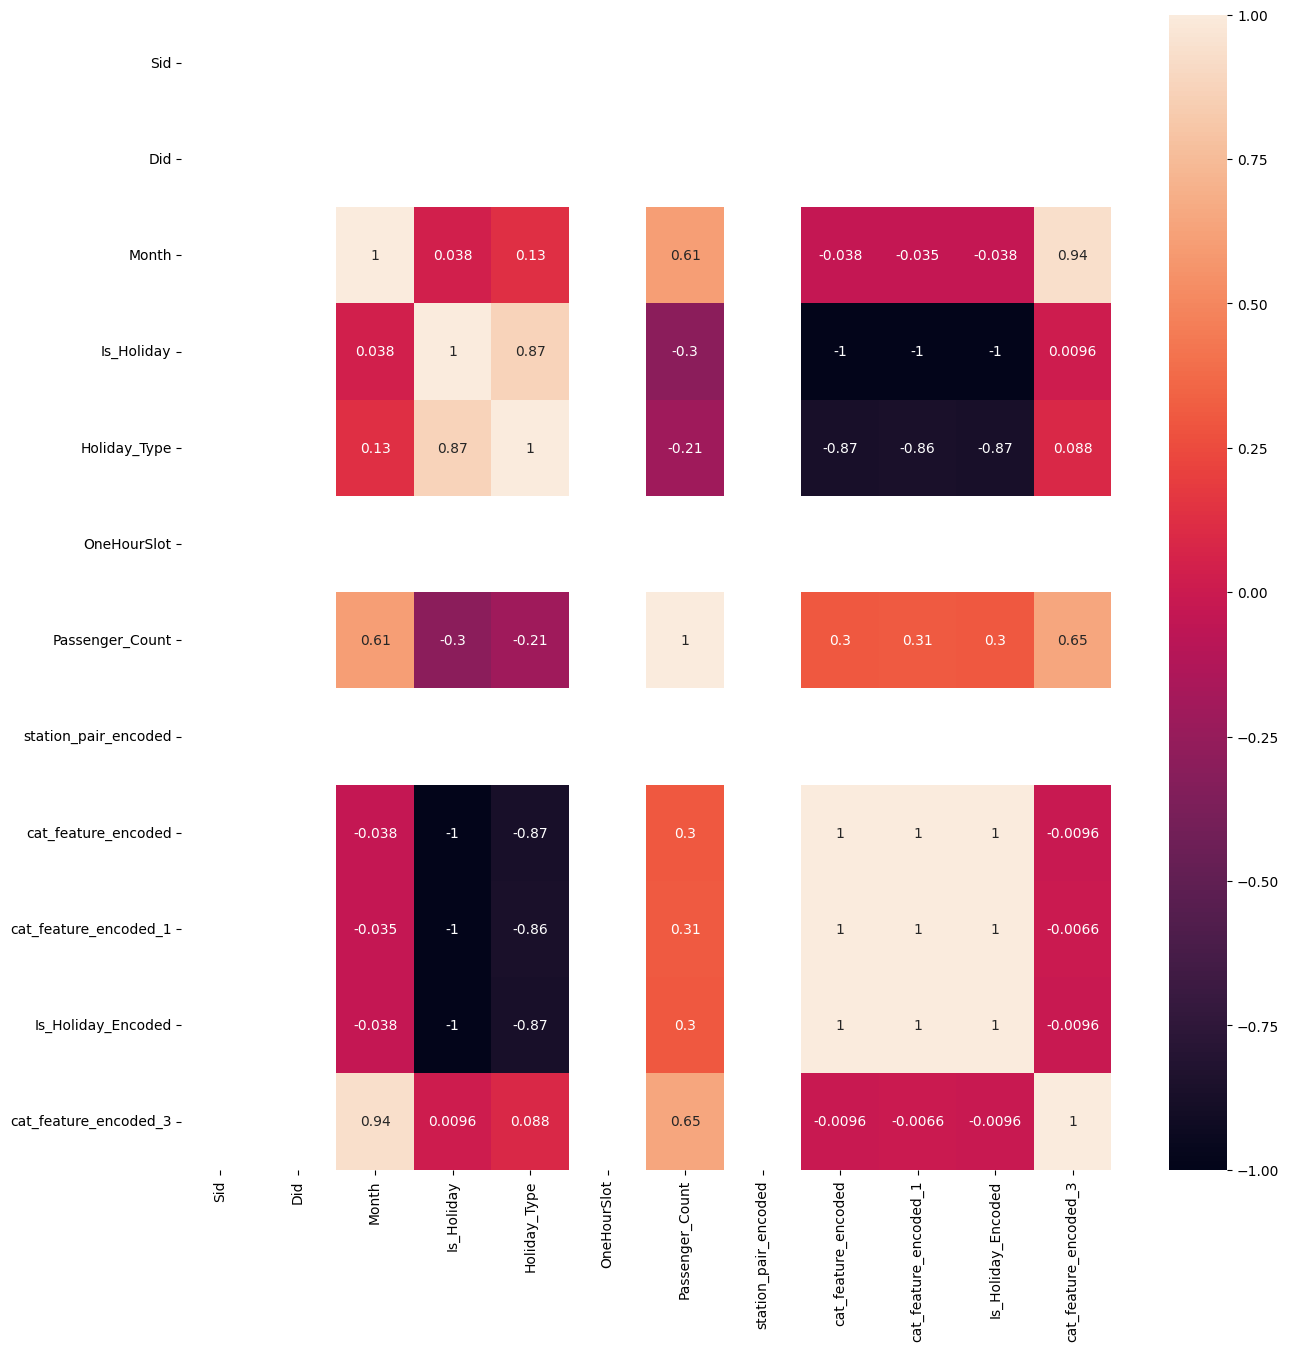

In [200]:
corr_matrix = hour2022.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [149]:
mean_target = hour2022.groupby('Month')['Passenger_Count'].sum()
hour2022['cat_feature_encoded_3'] = hour2022['Month'].map(mean_target)

In [136]:
# Target encoding
# mean_target = hour2022.groupby('Is_Holiday')['Passenger_Count'].sum()
# hour2022['cat_feature_encoded'] = hour2022['Is_Holiday'].map(mean_target)

mean_target = hour2022.groupby('Holiday_Type')['Passenger_Count'].sum()
hour2022['cat_feature_encoded_1'] = hour2022['Holiday_Type'].map(mean_target)

In [142]:
dummy_data = hour2022[['Passenger_Count', 'Is_Holiday', "Holiday_Type"]].copy()

In [147]:
freq_encoding = hour2022['Holiday_Type'].value_counts().to_dict()
hour2022['Is_Holiday_Encoded'] = hour2022['Is_Holiday'].map(freq_encoding)

In [129]:
poly_features_df = pd.concat([poly_features_df, hour2022[['Is_Holiday']].reset_index(drop=True)], axis=1)

In [175]:
poly_features_df['Date_Time'] = hour2022.index.copy()
poly_features_df.set_index('Date_Time', inplace=True)

In [177]:
poly_features_df = poly_features_df.resample('H').mean().ffill()

In [178]:
poly_features_df

,1,Is_Holiday,Holiday_Type,Month,Is_Holiday Holiday_Type,Is_Holiday Month,Holiday_Type Month,Passenger_Count
Date_Time,,,,,,,,
2022-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.203344
2022-01-01 01:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.222038
2022-01-01 02:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.222038
2022-01-01 03:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.222038
2022-01-01 04:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.222038
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.120498
2022-12-31 20:00:00,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.175480
2022-12-31 21:00:00,1.0,0.0,0.0,12.0,0.0,0.0,0.0,-0.024104


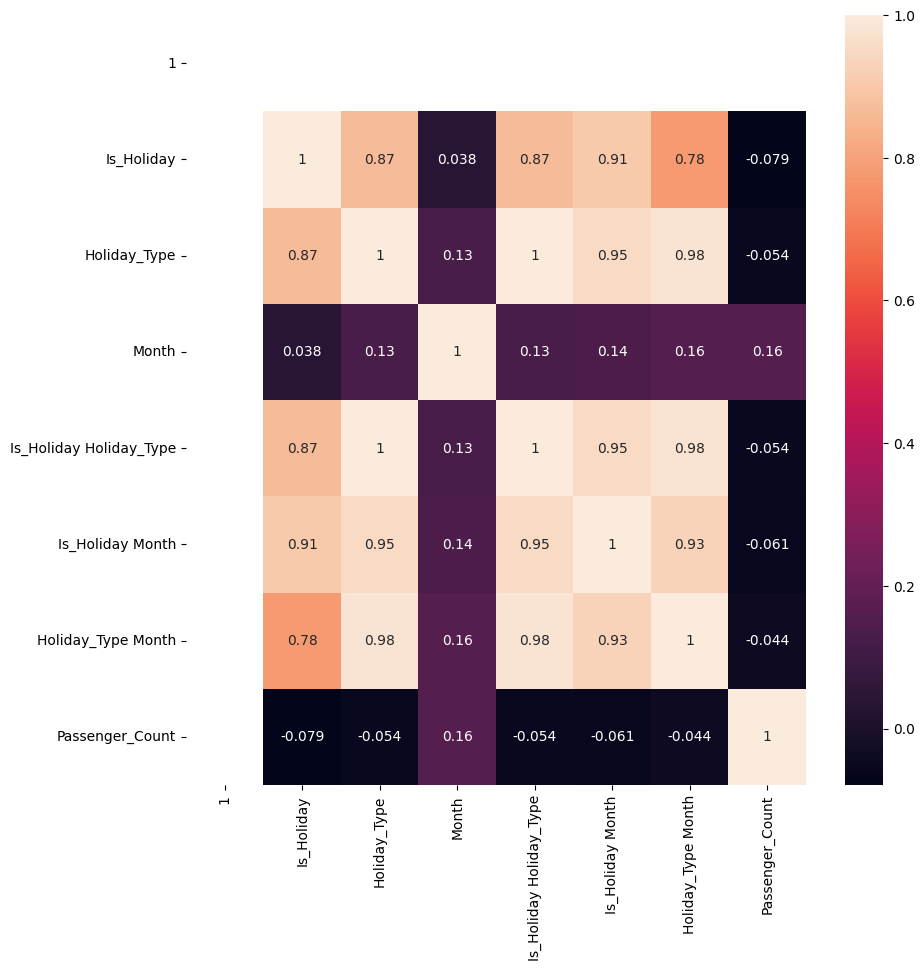

In [179]:
corr_matrix_1 = poly_features_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix_1, annot=True)
plt.show()

In [154]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_test, y_test = train_test_split()

## feature analysis

In [34]:
hour2022.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 297840 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sid                   297840 non-null  float64
 1   Did                   297840 non-null  float64
 2   Year                  297840 non-null  int64  
 3   Month                 297840 non-null  int64  
 4   Is_Holiday            297840 non-null  int64  
 5   Holiday_Type          297840 non-null  int64  
 6   OneHourSlot           297840 non-null  int64  
 7   Weekday               297840 non-null  int64  
 8   Passenger_Count       297840 non-null  float64
 9   station_pair_encoded  297840 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 25.0 MB


In [35]:
hour2022.drop('Weekday', axis=1, inplace=True)

In [20]:
hour2022 = hour2022.resample('H').mean().ffill()
hour2022 = hour2022.interpolate(method='linear')

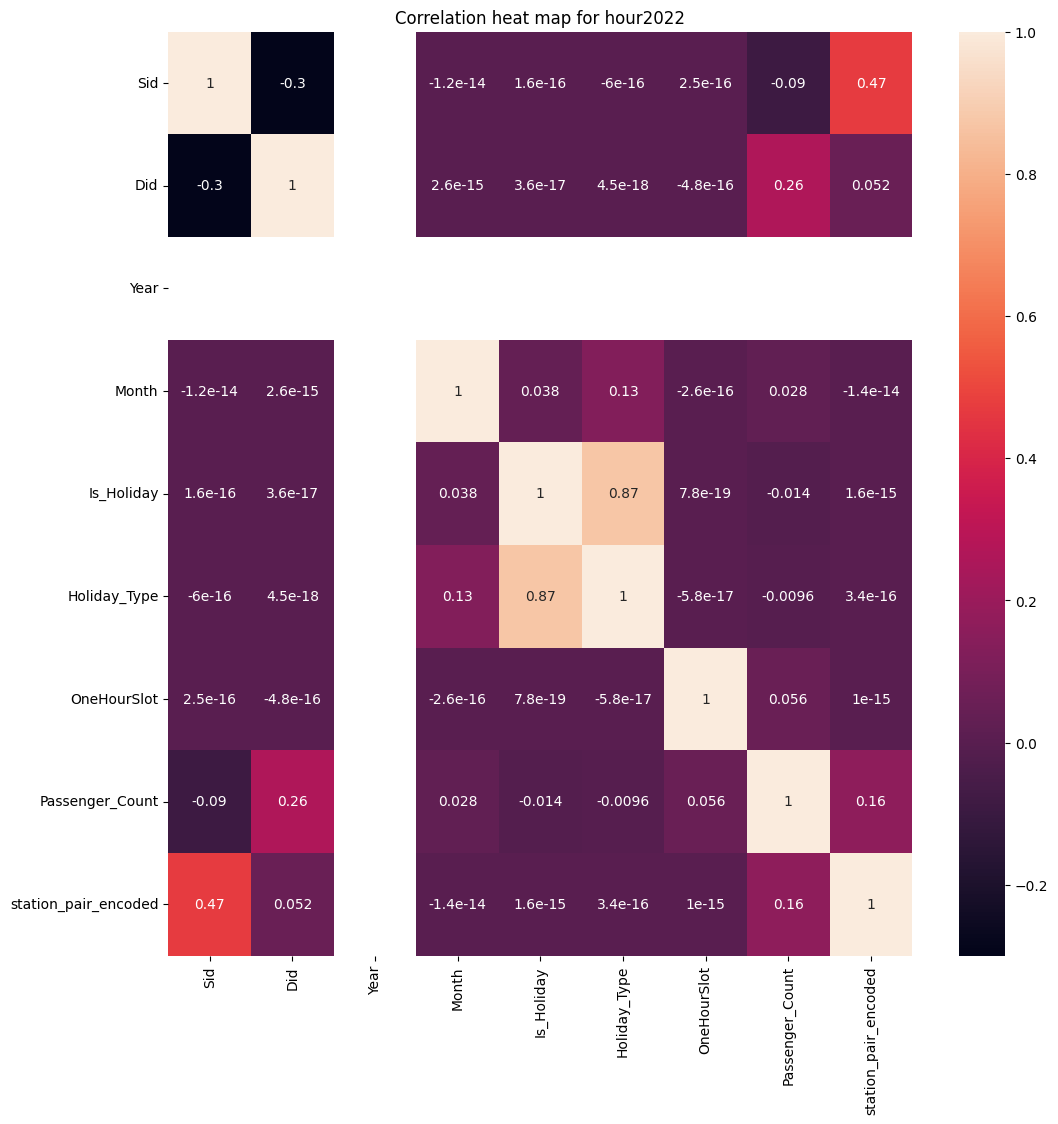

In [37]:
plt.figure(figsize = (12,12))
corr_matrix = hour2022.corr(method='pearson')
# corr_matrix.drop(['Sid', 'Did', 'station_pair_encoded'], axis=1, inplace=True)
# corr_matrix.drop(['Sid', 'Did', 'station_pair_encoded'], axis=0, inplace=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation heat map for hour2022')
plt.show()

In [245]:
## Step-1: Target encoding
mean_target = hour2022.groupby('station_pair_encoded')['Passenger_Count'].sum()
hour2022['station_pair_encoded_1'] = hour2022['station_pair_encoded'].map(mean_target)

In [ ]:
## Step-2: resampling


## Step-3: Corr maps


## Step-4: XGBoost feature importances


## Step-5: SHAP

In [12]:
hour2022.drop(['Year', 'Date', 'Time'], axis=1, inplace=True)

In [14]:
resampled_data = hour2022.copy()
resampled_data = resampled_data.resample('H').mean().ffill()
resampled_data = resampled_data.interpolate(method='linear')

In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap

In [58]:
hour2022.columns

Index(['Sid', 'Did', 'Month', 'Is_Holiday', 'Holiday_Type', 'OneHourSlot',
       'Weekday', 'Passenger_Count', 'station_pair_encoded'],
      dtype='object')

In [59]:
X,y = hour2022[['Sid', 'Did', 'Month', 'station_pair_encoded', 'Is_Holiday', 'Holiday_Type', 'OneHourSlot', 'Weekday']], hour2022['Passenger_Count']
X1, y1 = resampled_data[['Sid', 'Did', 'Month', 'Is_Holiday', 'Holiday_Type', 'OneHourSlot', 'Weekday', 'station_pair_encoded']], resampled_data['Passenger_Count']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.3, random_state=42)

In [61]:
regressor = XGBRegressor(n_estimators=200, max_depth=2)
regressor.fit(X_train, y_train, early_stopping_rounds=20, eval_set = [(X_test, y_test)])

[0]	validation_0-rmse:49.12284
[1]	validation_0-rmse:46.48426
[2]	validation_0-rmse:43.68834
[3]	validation_0-rmse:42.32555
[4]	validation_0-rmse:41.36362
[5]	validation_0-rmse:40.50127
[6]	validation_0-rmse:38.99706
[7]	validation_0-rmse:37.20644
[8]	validation_0-rmse:36.44568
[9]	validation_0-rmse:36.05325
[10]	validation_0-rmse:35.64612
[11]	validation_0-rmse:35.48247
[12]	validation_0-rmse:35.22507
[13]	validation_0-rmse:35.03045
[14]	validation_0-rmse:34.67990
[15]	validation_0-rmse:33.89945
[16]	validation_0-rmse:33.77530
[17]	validation_0-rmse:33.65546
[18]	validation_0-rmse:33.45793
[19]	validation_0-rmse:33.36938
[20]	validation_0-rmse:33.29267
[21]	validation_0-rmse:33.11018
[22]	validation_0-rmse:32.71167
[23]	validation_0-rmse:32.35447
[24]	validation_0-rmse:32.29377
[25]	validation_0-rmse:32.22734
[26]	validation_0-rmse:32.07802
[27]	validation_0-rmse:31.97931
[28]	validation_0-rmse:31.93236
[29]	validation_0-rmse:31.59180
[30]	validation_0-rmse:31.54666
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
regressor1 = XGBRegressor(n_estimators=200, max_depth=2)
regressor1.fit(X_train1, y_train1, early_stopping_rounds=20, eval_set = [(X_test1, y_test1)])

[0]	validation_0-rmse:7.86561
[1]	validation_0-rmse:6.65818
[2]	validation_0-rmse:5.85790
[3]	validation_0-rmse:5.24016
[4]	validation_0-rmse:4.86965
[5]	validation_0-rmse:4.65355
[6]	validation_0-rmse:4.33562
[7]	validation_0-rmse:4.16644
[8]	validation_0-rmse:4.03471
[9]	validation_0-rmse:3.89230
[10]	validation_0-rmse:3.77078
[11]	validation_0-rmse:3.69267
[12]	validation_0-rmse:3.61741
[13]	validation_0-rmse:3.54900
[14]	validation_0-rmse:3.38490
[15]	validation_0-rmse:3.31915
[16]	validation_0-rmse:3.27980
[17]	validation_0-rmse:3.23860
[18]	validation_0-rmse:3.20156
[19]	validation_0-rmse:3.08042
[20]	validation_0-rmse:3.02130
[21]	validation_0-rmse:2.90394
[22]	validation_0-rmse:2.87871
[23]	validation_0-rmse:2.84584
[24]	validation_0-rmse:2.82544
[25]	validation_0-rmse:2.80074
[26]	validation_0-rmse:2.78506
[27]	validation_0-rmse:2.73235
[28]	validation_0-rmse:2.70396
[29]	validation_0-rmse:2.69103
[30]	validation_0-rmse:2.67527
[31]	validation_0-rmse:2.62920
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
hour2022_feature_importances = regressor.feature_importances_
hour2022_features = X.columns

resampled_feature_importances = regressor1.feature_importances_
resampled_features = X1.columns

def plot_importances(features, feature_importances):

    # Create a DataFrame for plotting
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances using matplotlib
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

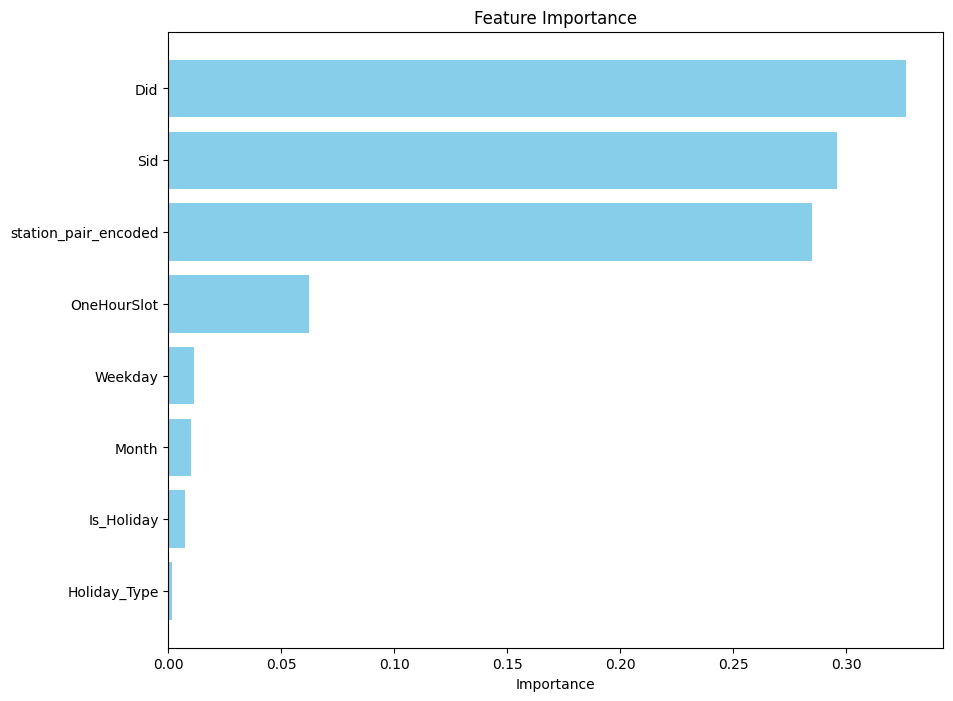

In [64]:
plot_importances(hour2022_features, hour2022_feature_importances)

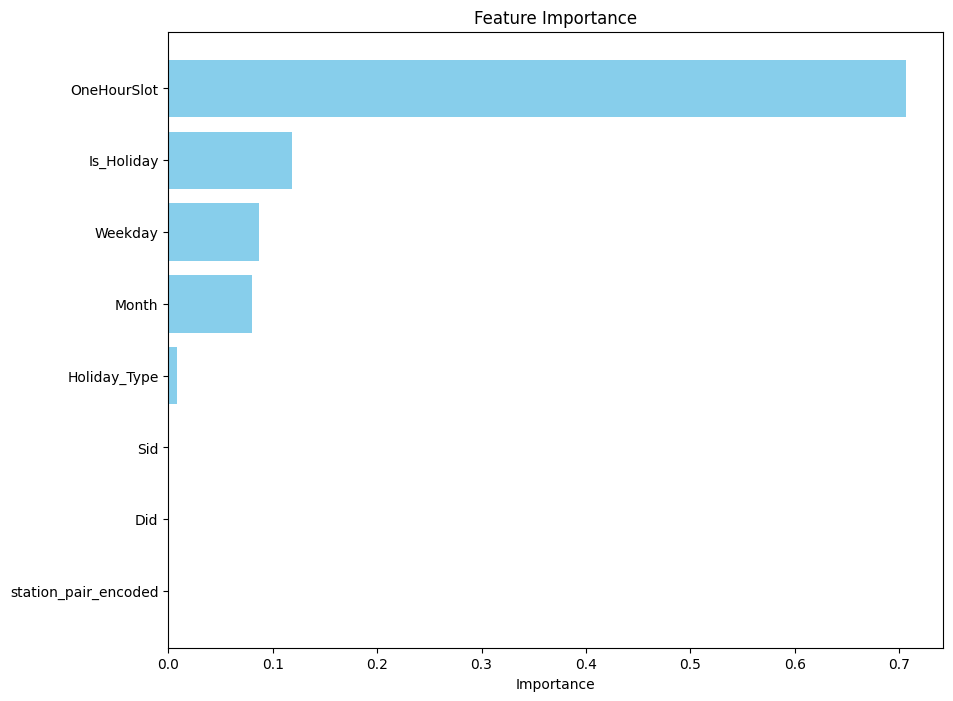

In [65]:
plot_importances(resampled_features, resampled_feature_importances)

In [41]:
# SHAP time baby!
shap.initjs()

In [66]:
hour22_explainer = shap.Explainer(regressor)
resampled_explainer = shap.Explainer(regressor1)

In [67]:
hour22_shap_values = hour22_explainer(X_test)
resampled_shap_values = resampled_explainer(X_test1)

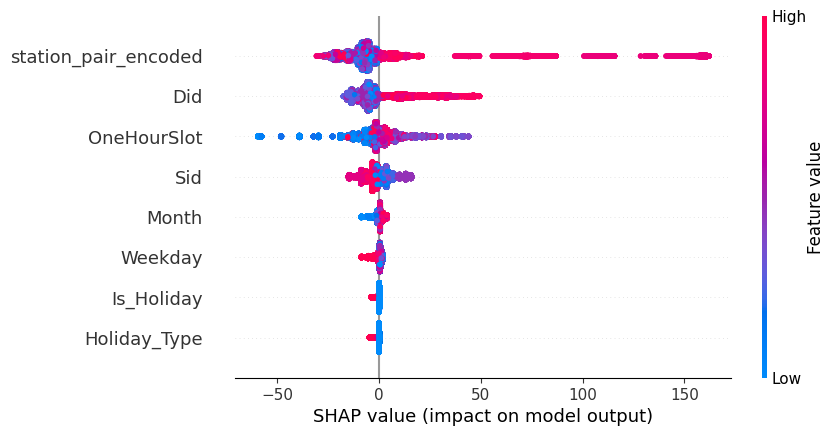

In [68]:
shap.plots.beeswarm(hour22_shap_values)

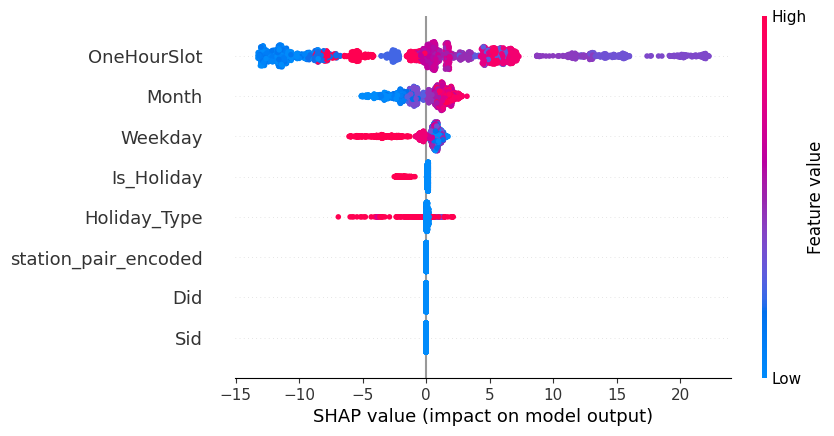

In [69]:
shap.plots.beeswarm(resampled_shap_values)

In [54]:
resampled_shap_values.values.shape

(2628, 8)